# Validation Service Benchmarks


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pprint import pprint

# Loading Data

In [39]:
metric_options = [
    ("timestamp", "Timestamp MS since Epoch"), #0
    ("CPU_ALL:User%", "CPU Total: User %"), # 1
    ("MEM:memtotal", "Memory MB: Total"), #2
    ("MEM:swapfree", "Memory MB: Swap Free"), #3
    ("MEM:active", "Memory MB: Active"), #4
    ("MEM:inactive", "Memory MB: Inactive"), #5
    ("NET:eno1-write-KB/s", "Network Write KB/s"), #6
    ("NET:eno1-read-KB/s", "Network Read KB/s"), #7
    ("DISKBUSY:sda", "Disk Busy %: /dev/sda"), #8
    ("DISKREAD:sda", "Disk Read KB/s: /dev/sda"), #9
    ("DISKWRITE:sda", "Disk Write KB/s: /dev/sda"), #10
    ("VM:pgfault", "Paging and Virtual Memory: Page Faults") #11
]

chosen_metric = metric_options[6]

benchmark_dir = "sh13rs_gisjoins_vs"
metric_header = chosen_metric[0]
metric_name = chosen_metric[1]


dataframes = []
for i in range(0, 50):
    machine_id = f"lattice-{100+i}"
    filename = f"{i}-{machine_id}.nmon.csv"
    filepath = f"{benchmark_dir}/{filename}"
    dataframes.append(pd.read_csv(filepath, header=0).pop(metric_header))


# Plotting

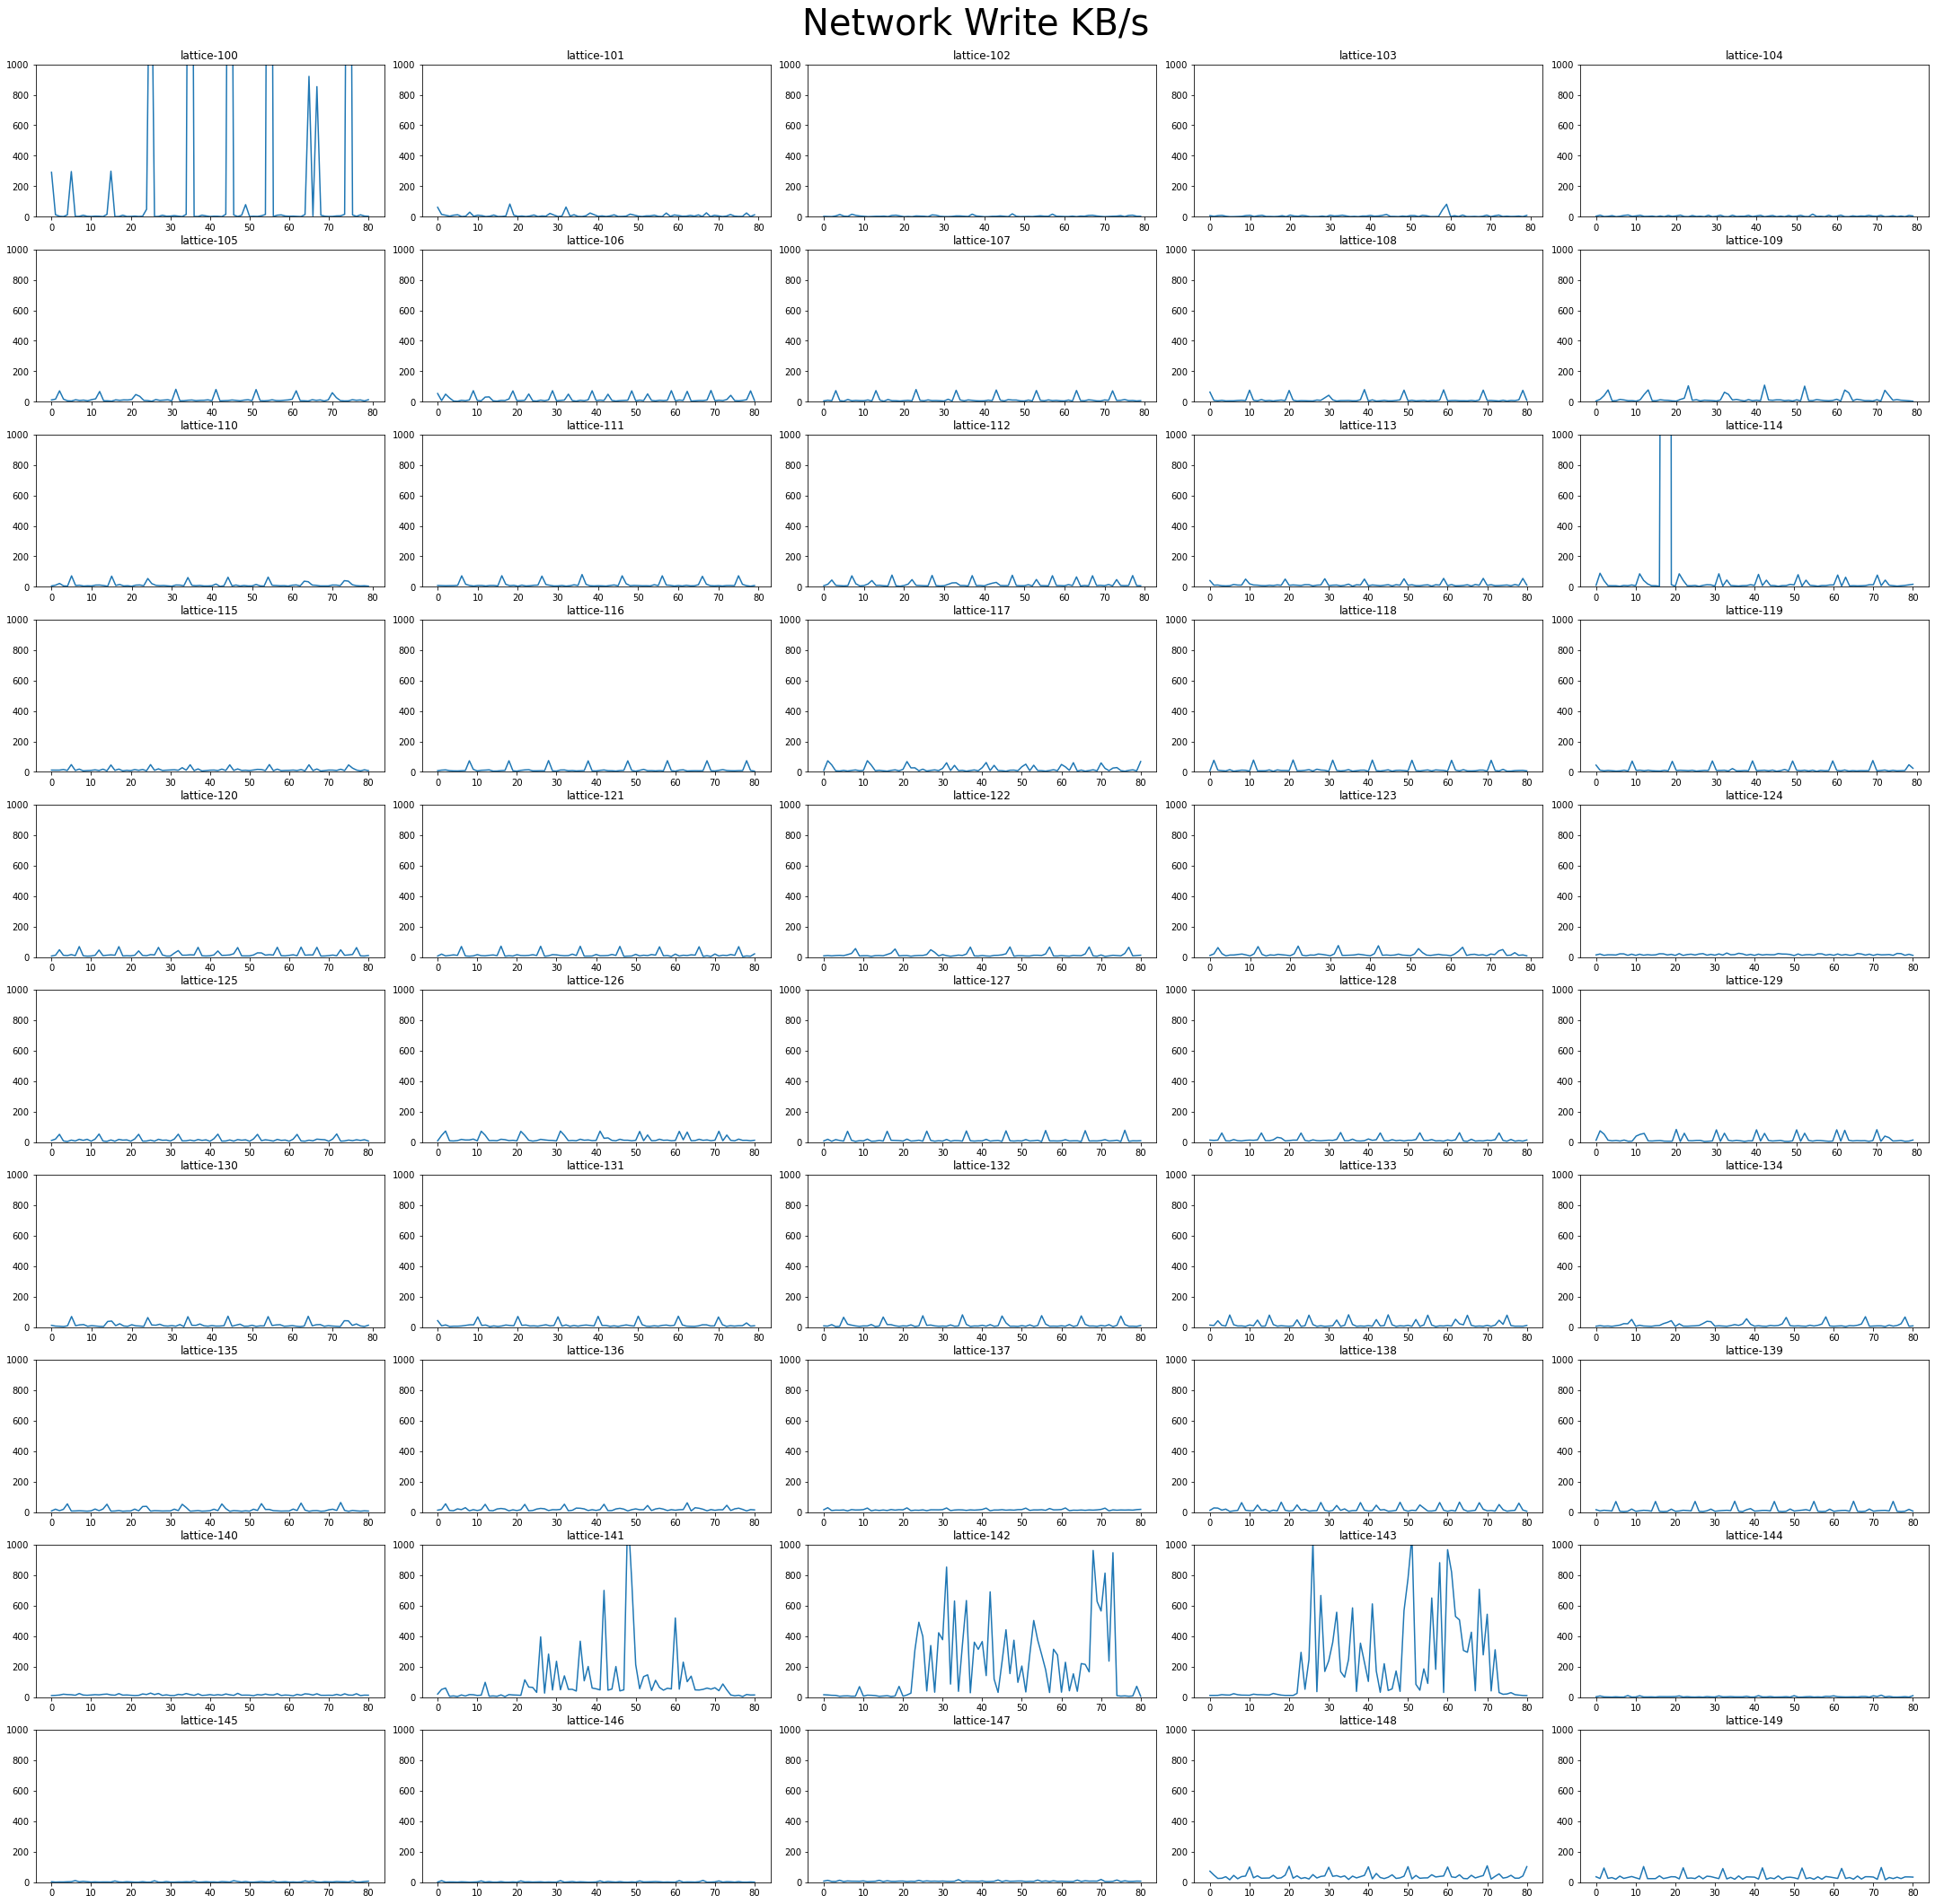

In [43]:
number_rows = 10
number_cols = 5

y_axis_limits = [0, 1000]

fig, ax = plt.subplots(nrows=number_rows, ncols=number_cols, figsize=(30, 30))
fig.tight_layout(h_pad=1.7)
fig.suptitle(metric_name, fontsize=40)

index = 0
for i in range(number_rows):
    for j in range(number_cols):
        ax[i,j].set_ylim(y_axis_limits)
        ax[i,j].plot(dataframes[index], label=f"Machine {index}")
        ax[i,j].set_title(f"lattice-{100+index}")
        index += 1

plt.subplots_adjust(top=0.95)
plt.show()